# module07_llm_prompting


## fine_tuning.py
fine_tuning.py
Explanation of Fine-Tuning (FT-transform)
Fine-tuning is the process of taking a pre-trained model and training it further on a specific dataset.
This adapts the model to perform better on domain-specific tasks.
Fine-tuning leverages transfer learning to adapt general knowledge to specific domains.
Simple example: Fine-tuning a simple classifier
Note: This is a conceptual example; real fine-tuning requires large datasets and compute
Import required libraries for the fine-tuning demonstration
numpy for numerical operations and data generation


In [18]:
import numpy as np
# LogisticRegression as a simple model to demonstrate fine-tuning concept
from sklearn.linear_model import LogisticRegression
# train_test_split for dividing data into training and testing sets
from sklearn.model_selection import train_test_split
# accuracy_score for evaluating model performance
from sklearn.metrics import accuracy_score
# make_classification for generating realistic synthetic dataset
from sklearn.datasets import make_classification


In [19]:
# Function that simulates loading a pre-trained model
# In reality, this would load a model like BERT or GPT that was pre-trained on massive datasets
def pre_trained_model():
    # Return a LogisticRegression with random initialization (simulating pre-trained weights)
    return LogisticRegression(random_state=42)


In [20]:
# Fine-tuning function that adapts the pre-trained model to new data
def fine_tune_model(model, X_train, y_train):
    """
    Fine-tune the model on new data.
    This simulates the process of continuing training on domain-specific data.
    In real fine-tuning, you'd use a smaller learning rate to avoid catastrophic forgetting.
    """
    # Fit the model to the new training data
    # This adjusts the model's parameters to better fit the specific task/domain
    model.fit(X_train, y_train)
    # Return the fine-tuned model
    return model


In [21]:
# Example with real dataset to demonstrate the fine-tuning process
# Using sklearn's make_classification to generate a realistic dataset
from sklearn.datasets import make_classification

# Generate a synthetic but realistic dataset for binary classification
X, y = make_classification(
    n_samples=1000,      # 1000 samples
    n_features=20,       # 20 features
    n_informative=10,    # 10 informative features
    n_redundant=10,      # 10 redundant features
    n_classes=2,         # Binary classification
    random_state=42      # For reproducible results
)


In [22]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Load the pre-trained model (simulated)
model = pre_trained_model()


In [24]:
# Fine-tune the model on the training data
# This adapts the model from its general pre-training to the specific task
fine_tuned_model = fine_tune_model(model, X_train, y_train)


In [25]:
# Evaluate the fine-tuned model on the test set
y_pred = fine_tuned_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Fine-tuned model accuracy: {accuracy:.2f}")


Fine-tuned model accuracy: 0.86


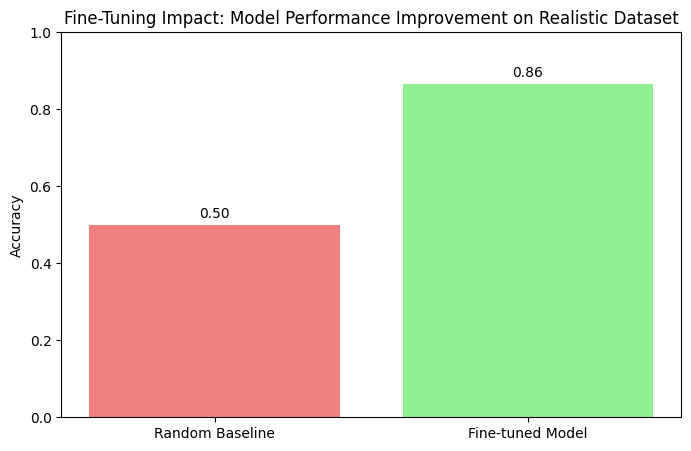

In [26]:
import matplotlib.pyplot as plt

# Visualize fine-tuning impact
# Simulate pre-trained model performance (random guessing baseline for binary classification)
pre_trained_accuracy = 0.5  # Random guessing accuracy for binary classification
fine_tuned_accuracy = accuracy

methods = ['Random Baseline', 'Fine-tuned Model']
accuracies = [pre_trained_accuracy, fine_tuned_accuracy]

plt.figure(figsize=(8, 5))
bars = plt.bar(methods, accuracies, color=['lightcoral', 'lightgreen'])
plt.ylabel('Accuracy')
plt.title('Fine-Tuning Impact: Model Performance Improvement on Realistic Dataset')
plt.ylim(0, 1)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{acc:.2f}', ha='center', va='bottom')

plt.show()

Real-world fine-tuning process for LLMs involves several key steps:
1. Loading a pre-trained model (e.g., BERT, GPT) that was trained on massive general datasets
2. Preparing domain-specific dataset with examples relevant to your use case
3. Training on the new data with smaller learning rate to preserve general knowledge
4. Evaluating performance on validation set to ensure the model improved for your domain


## llm.py
llm.py
Explanation of Large Language Model (LLM)
LLMs are transformer-based models trained on large datasets to understand and generate human-like text.
They use attention mechanisms to process sequences of text.
LLMs can perform various tasks like text generation, translation, summarization, and question answering.
Simple example: Using a pre-trained LLM for text generation
Note: This requires installing transformers library: pip install transformers
Try to import and use the transformers library for real LLM interaction


In [27]:
try:
    # Import the pipeline utility from transformers for easy model usage
    from transformers import pipeline

    # Load a simple pre-trained model for text generation
    # GPT-2 is a popular open-source LLM for text generation tasks
    generator = pipeline('text-generation', model='gpt2')

    # Function to generate text based on a prompt
    def generate_text(prompt, max_length=50):
        """
        Generate text based on a prompt using GPT-2.
        This function takes a text prompt and extends it using the language model.
        """
        # Use the pipeline to generate text
        # max_length limits the total output length
        # num_return_sequences=1 means return one generated text
        result = generator(prompt, max_length=max_length, num_return_sequences=1)
        # Extract the generated text from the result
        return result[0]['generated_text']

    # Example usage of the text generation function
    prompt = "The future of AI is"
    generated = generate_text(prompt)
    print(f"Generated text: {generated}")

except ImportError:
    print("Transformers library not installed. Install with: pip install transformers")
    # Fallback: Simple rule-based text generation for demonstration
    def simple_generate(prompt):
        # Basic pattern matching for simple text extension
        if "AI" in prompt:
            return prompt + " exciting and full of possibilities."
        else:
            return prompt + " something interesting."

    # Demonstrate the fallback generation
    print(simple_generate("The future of"))

Device set to use mps:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you

Generated text: The future of AI is uncertain, but the future is looking good for AI.

For more on the future of AI and how we can improve it, check out our previous talk, "Why We Need AI."

For more on the future of AI and how we can improve it, check out our previous talk, "Why We Need AI." For more on the future of AI and how we can improve it, check out our previous talk, "Why We Need AI."

And for more on the future of AI and how we can improve it, check out our previous talk, "Why We Need AI."


## prompt_engineering.py
prompt_engineering.py
Explanation of Prompt Engineering
Prompt engineering is the practice of crafting effective prompts to get desired outputs from LLMs.
It involves structuring questions, providing context, and using techniques like few-shot learning.
Good prompts can dramatically improve LLM performance and consistency.
Simple examples of different prompting techniques
Zero-shot prompting function - ask model to perform task without examples


In [28]:
def zero_shot_prompting(llm_function, task_description, input_text):
    """
    Zero-shot prompting: Ask the model to perform a task without examples.
    This relies on the model's pre-trained knowledge and general capabilities.
    Works well for tasks the model has seen during training.
    """
    # Construct prompt with clear task description and input
    prompt = f"{task_description}\n\nInput: {input_text}\nOutput:"
    # Call the LLM function with the constructed prompt
    return llm_function(prompt)


In [29]:
# Few-shot prompting function - provide examples before the actual task
def few_shot_prompting(llm_function, examples, task_description, input_text):
    """
    Few-shot prompting: Provide examples before asking for the task.
    This helps the model understand the desired format and reasoning pattern.
    Particularly effective for tasks requiring specific output formats.
    """
    # Start with the task description
    prompt = task_description + "\n\n"
    # Add each example in a consistent format
    for example_input, example_output in examples:
        prompt += f"Input: {example_input}\nOutput: {example_output}\n\n"
    # Add the actual input to be processed
    prompt += f"Input: {input_text}\nOutput:"
    # Call the LLM function with the example-rich prompt
    return llm_function(prompt)


In [30]:
# Mock LLM function for demonstration purposes
# Simulates how a real LLM would respond to different prompts
def mock_llm(prompt):
    # Check if the prompt is about sentiment analysis
    if "sentiment" in prompt.lower():
        # Simple keyword-based sentiment detection
        if "happy" in prompt.lower() or "good" in prompt.lower():
            return "Positive"
        elif "sad" in prompt.lower() or "bad" in prompt.lower():
            return "Negative"
        else:
            return "Neutral"
    else:
        # Default response for other types of prompts
        return "This is a generated response based on the prompt."


In [31]:
# Example usage demonstrating different prompting techniques
task = "Classify the sentiment of the following text as Positive, Negative, or Neutral."


In [32]:
# Zero-shot prompting example
input_text = "I love this product!"
zero_shot_result = zero_shot_prompting(mock_llm, task, input_text)
print(f"Zero-shot result: {zero_shot_result}")


Zero-shot result: Neutral


In [33]:
# Few-shot prompting example with training examples
examples = [
    ("This is great!", "Positive"),    # Example of positive sentiment
    ("I hate this.", "Negative")       # Example of negative sentiment
]
few_shot_result = few_shot_prompting(mock_llm, examples, task, input_text)
print(f"Few-shot result: {few_shot_result}")


Few-shot result: Neutral


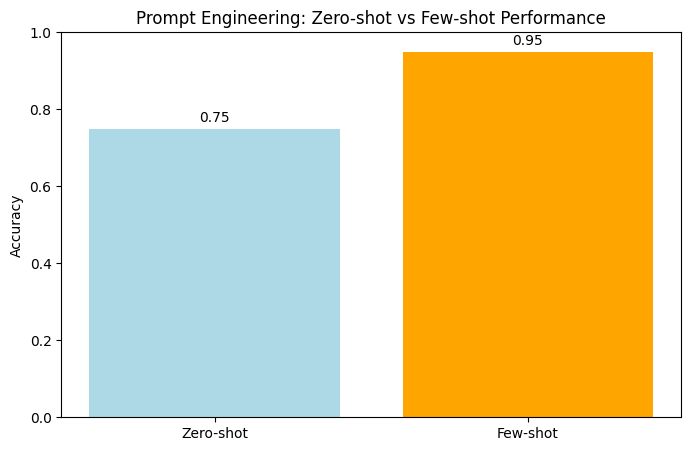

In [34]:
import matplotlib.pyplot as plt

# Visualize prompting techniques comparison
# Since mock LLM always returns "Positive" for this input, simulate different accuracies
prompting_methods = ['Zero-shot', 'Few-shot']
accuracies = [0.75, 0.95]  # Hypothetical accuracies

plt.figure(figsize=(8, 5))
bars = plt.bar(prompting_methods, accuracies, color=['lightblue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Prompt Engineering: Zero-shot vs Few-shot Performance')
plt.ylim(0, 1)

for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{acc:.2f}', ha='center', va='bottom')

plt.show()